### 3. 분류
### 3.1 MNIST

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [100]:
X, y = mnist["data"], mnist["target"]
X = np.array(X)
y = y.astype(np.int8)

print(X.shape, y.shape)

(70000, 784) (70000,)


In [101]:
import numpy as np

In [3]:
if i <= 3 or i >= 17 for i in range(20)

SyntaxError: invalid syntax (<ipython-input-3-706de7375c54>, line 1)

In [8]:
mystr = 'life is too short'
print(mystr[::-1])

trohs oot si efil


In [19]:
test = [['ghd',11], ['ds',12, 3], ['afa',42]]
print(len(test))
test[-2][1:-1]

3


[12]

In [21]:
def ma(x):
    return x*2
result = map(ma, [1,2,3,4])
print(list(result))

[2, 4, 6, 8]


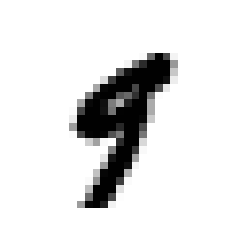

In [103]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [104]:
y[36000]

9

In [105]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [106]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### 3.2 이진 분류기 훈련

In [107]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [108]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
y_train_5

56599    False
43647    False
29253     True
27738    False
12706    False
         ...  
2322     False
39534    False
14990    False
39623    False
11090    False
Name: class, Length: 60000, dtype: bool

In [109]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [110]:
sgd_clf.predict([some_digit])

array([False])

SGDClassifier는 이진 선형 분류기로

- 계산값을 기반으로 계산값이 0보다 작으면 -1, 0보다 크면 1로 분류한다.
- 이진 선형 분류기는 선, 평면, 초평면을 이용해 2개의 클래스를 구분하는 분류기이다.

### 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

위 코드는 사이킷런의 cross_val_score() 함수와 거의 같은 작업을 수행하고 동일한 결과를 출력합니다.

StratifiedKFold는 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링을 수행합니다.

In [112]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.95735, 0.96135, 0.9695 ])

정확도가 95%이상으로 매우 높게 나타났다.

In [113]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [114]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90955, 0.9097 , 0.9097 ])

5-감지기는 5가 아님 을 예측할 확률이 90% 이상으로 측정되었다.

이는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여준다.
특히, 불균형 데이터셋을 다룰때 (어떤 클래스가 다른 것보다 월등히 많은 경우) 더욱 그렇다.

### 3.3.2 오차 행렬

분류기의 성능을 평가하는 더 좋은 방법은 오차 행렬(confusion matrix)를 조사하는 것이다.

In [116]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [142]:
y_train_pred.shape

(60000,)

cross_val_predict는 cross_val_score와 마찬가지로 K-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다.

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53826,   753],
       [ 1483,  3938]])

행 = 실제 클래스, 열 = 예측 클래스

||예측P|예측N|
|--|--|--|
|실제P|TP|FN|
|실제N|FP|TN|

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$

### 3.3.3 정밀도와 재현율

In [124]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.839479855041569
0.7264342372256042


앞서 90%가 넘었던 정확도와 비교해서 수치가 비교적 낮은 것으로 보인다.

In [126]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.778876582278481

정밀도와 재현율을 F1점수로 변형하여 사용하면 편리한 경우가 많다. 정밀도와 재현율이 비슷한 분류기에서 F1점수가 높다. 하지만 항상 이게 바람직한 것은 아니다. 상황에 따라 정밀도나 재현율 중 하나가 더 중요한 경우가 있다.

ex)
- 정밀도 : 안전한 동영상 분류기, 좋은 영상을 많이 제외하더라도(낮은 재현율) 안전한 것들만 노출시킴(높은 정밀도)
- 재현율 : 감시 카메라 분류기, 경비원이 잘못된 호출을 받더라도(낮은 정밀도) 거의 모든 종도둑을 잡아냄(높은 재현율)

### 3.3.4 정밀도/재현율 트레이드오프

In [145]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-350314.71344674])

* decision_function : 결정 함수, 임계값을 기준으로 양성 클래스나 음성 클래스에 속한다고 믿는 정도

ex) 4.23xx = 양성, -1.62xx = 음성 (임곗값이 0일때)

사이킷런에서 임계값을 직접 지정할 수는 없음

In [148]:
threshold = -400000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [149]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [150]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/yoonsung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [151]:
y_train_5.shape

(60000,)

In [152]:
y_scores.shape

(60000,)

In [153]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [154]:
precisions, recalls, thresholds

(array([0.0910251 , 0.09100984, 0.09101137, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-1556658.84904734, -1556398.74825082, -1555751.82960944, ...,
          918123.95020997,   939691.87906567,  1108104.14911643]))

In [167]:
# 항상 분석 전 디폴트 라이브러리 임포트

import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import set_matplotlib_formats
import matplotlib
import warnings
warnings.filterwarnings(action="ignore")

matplotlib.rc('font', family='AppleGothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus=False)

pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.set_option('display.float_format', '{:.2f}'.format)

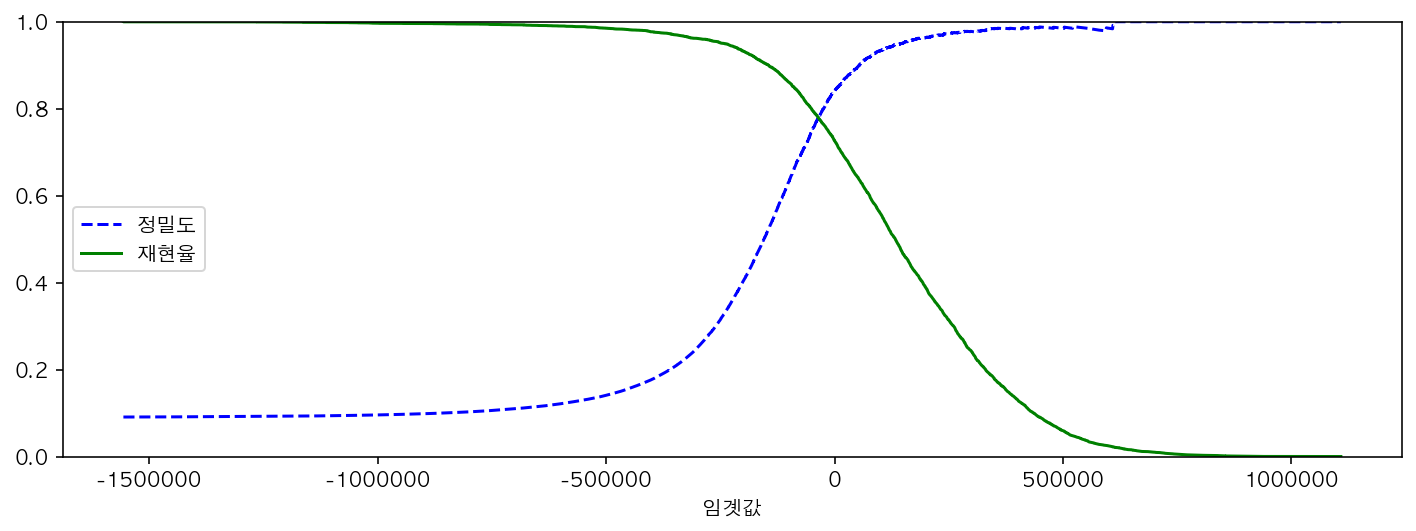

In [189]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.ticklabel_format(style='plain') # scientific notation 제거
    plt.xlabel("임곗값")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plt.figure(figsize=(12,4)) # 그래프 크기 변경
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

임계값이 높아질수록 재현율은 낮아지고, 정밀도는 높아짐을 알 수 있다.

정밀도 곡선이 재현율 곡선보다 더 울퉁불퉁한 이유는 임곗값을 올리더라도 정밀도가 가끔 낮아질 때가 있기 때문이다.(일반적으로는 높아져야 함)

이제 작업에 맞는 최선의 정밀도/재현율 트레이드오프를 만드는 임곗값을 선택하면 된다.

재현율에 대한 정밀도 곡선을 그리면 좋은 정밀도/재현율 트레이드오프를 선택하는 데 도움이 된다.

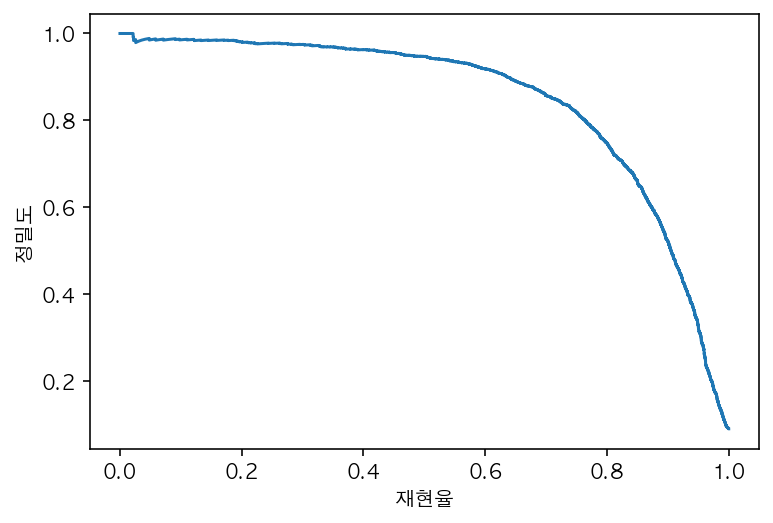

In [174]:
plt.plot(recalls, precisions)
plt.xlabel("재현율")
plt.ylabel("정밀도")
plt.show()

재현율 80% 근처에서 정밀도가 급격하게 줄어들기 시작한다. 이 하강점 직전을 정밀도/재현율 트레이드오프를 선택하는 것이 좋다. 예를 들면 재현율이 60% 정도인 지점입니다. 프로젝트에 따라 달라질 수 있습니다.

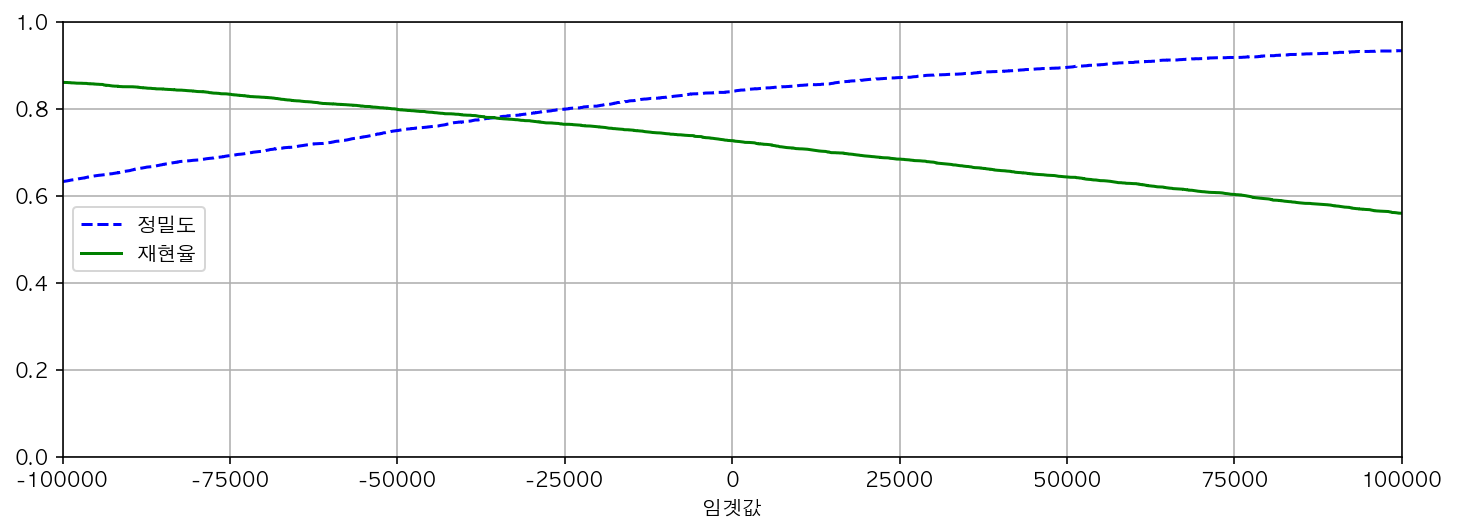

In [192]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.ticklabel_format(style='plain') # scientific notation 제거
    plt.xlabel("임곗값")
    plt.legend(loc="center left")
    plt.grid()
    plt.xlim([-100000,100000])
    plt.ylim([0, 1])

plt.figure(figsize=(12,4)) # 그래프 크기 변경
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

정밀도 90%를 달성하는 것이 목표라고 가정하면, 그래프에서 임곗값이 약 50,000정도라는 것을 알 수 있습니다.(확대해서 살펴보기) 훈련 세트에 대한 예측을 만들려면 분류기의 predict() 메서드를 호출하는 대신 다음 코드를 실행하면 됩니다.

In [193]:
y_train_pred_90 = (y_scores > 50000)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.8949935815147625
0.643054786939679


정밀도 90%를 달성한 분류기를 만들었다. 가상의 정밀도에 대해서도 분류기를 쉽게 만들 수 있음을 알 수 있다. 충분히 큰 임곗값을 지정하면 끝이다. 하지만 재현율이 너무 낮다면 높은 정밀도의 분류기는 전혀 유용하지 않다! '99% 정밀도를 달성하자'라고 하면 '재현율은 얼마?'라고 반드시 물어야한다.

### 3.3.5 ROC곡선

수신지 조작 특성 (Receiver Operating Characteristic = ROC) 곡선도 이진 분류에서 널리 사용되는 도구다.

ROC 곡선은 거짓 양성 비율(false positive rate = FRP) 에 대한 진짜 양성 비율(true positive rate = TPR) 의 곡선이다.

ROC 곡선은 민감도(재현율)에 대한 1-특이도(specificity) 그래프이다.
$$Specificity = \frac{TN}{FP + TN}$$

In [195]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

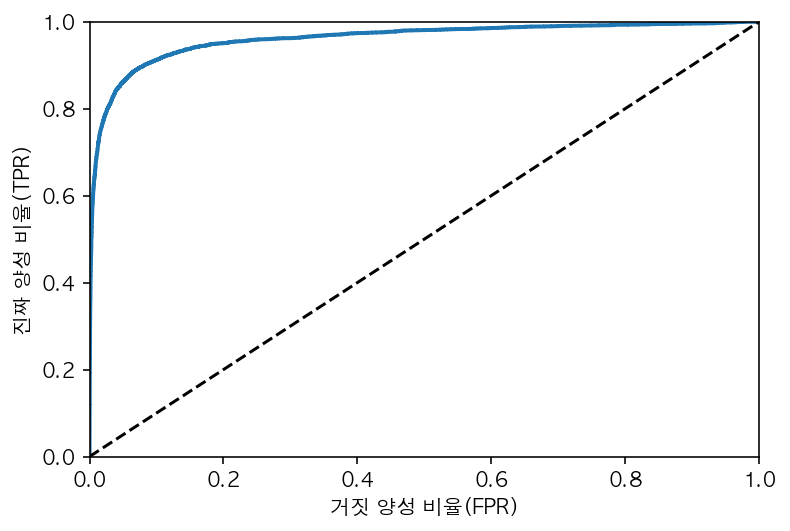

In [196]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율(FPR)')
    plt.ylabel('진짜 양성 비율(TPR)')
    
plot_roc_curve(fpr, tpr)
plt.show()

좋은 분류기는 점선으로부터 최대한 멀리 떨어져 있어야 한다.

즉, 곡선 아래의 면적(area under the curve = AUC)가 커야 한다.

완벽한 분류기는 AUC=1이고, 완전한 랜덤 분류기는 AUC=0.5이다.

In [197]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9613528226165627

ROC곡선과 PR(정밀도/재현율) 곡선 중 어느 것을 사용해야 할까.

일반적인 법칙은 양성 클래스(P)가 드물거나 거짓 음성(FN)보다 거짓 양성(FP)이 더 중요할 때 PR곡선을 사용하고 그렇지 않으면 ROC 곡선을 사용합니다.

In [198]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

RandomForestClassifier에는 decision_function()메서드가 없고, 대신 predict_proba()메서드가 있다. 사이킷런 분류기는 일반적으로 두 메서드 중 하나 또는 둘 모두를 가지고 있다.

predict_proba() 메서드는 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환한다.

In [199]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

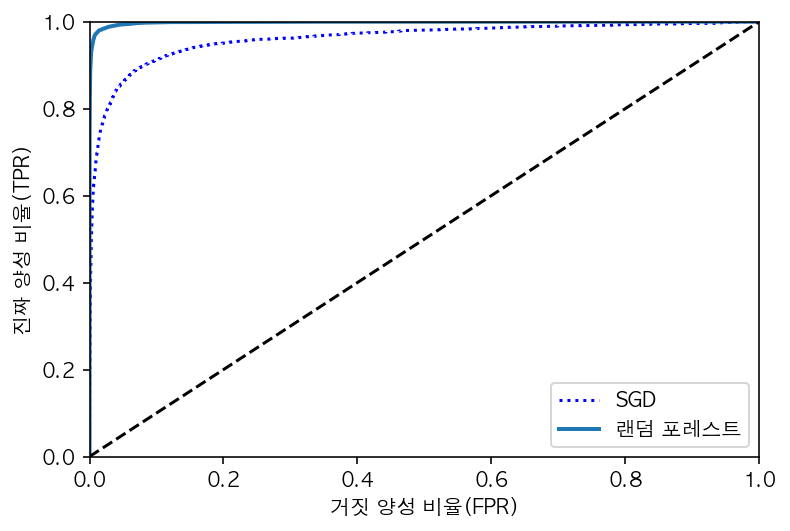

In [200]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right")
plt.show()

두 모델을 비교해보면, SGD보다 랜덤 포레스트가 왼쪽 모서리에 더 가까운 것을 알 수 있다.

이진 분류기를 훈련시키는 방법, 작업에 맞는 적절한 지표 선택, 교차 검증을 사용한 평가, 요구사항에 맞는 정밀도/재현율 트레이드오프 선택, ROC곡선과 ROC AUC 점수를 사용한 여러 모델의 비교에 대해 알아 보았다.

### 3.4 다중 분류

- 다중 분류기(다항 분류기) 가능 = 랜덤 포레스트 나이브 베이즈 등
- 이진 분류기만 가능 = 서포트 벡터 머신, 선형 분류기
- 일대다(one-versus-all, one-versus-the-rest = OvA) 전략 과 일대일(one-versus-one = OvO)전략을 통해 이진 분류기 여러개로 다중 분류를 진행할 수도 있다.

SVM은 OvO를 적용하고, 선형 분류기는 OvA를 선택하기도 한다. (SVM은 훈련 세트의 크기에 민감하기 때문)

In [204]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([9], dtype=int8)

In [205]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-894708.63621989, -382941.76620019, -756667.45791241,
        -206606.13368067, -131482.02582012, -149361.71405397,
        -731885.19809315, -222861.12764607, -458085.56809839,
        -129649.65902425]])

내부에서는 사이킷런이 실제로 10개의 이진 분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택합니다.

In [206]:
np.argmax(some_digit_scores)

9

In [208]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [211]:
sgd_clf.classes_[9]

9

분류기가 훈련될 때 classes_속성에 타깃 클래스의 리스트를 값으로 정렬하여 저장한다.

In [212]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([9], dtype=int8)

OvO를 이용하여 선형분류기를 활용해 다중 분류를 하는 코드는 위와 같다.

In [213]:
len(ovo_clf.estimators_)

45

In [215]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9], dtype=int8)

랜덤포레스트를 이용하여 다중분류를 진행한다. 랜덤포레스트는 직접 샘플을 다중 클래스로 분류할 수 있다.

In [216]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.  , 0.  , 0.09, 0.  , 0.01, 0.03, 0.01, 0.85]])

In [217]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84985, 0.8536 , 0.87715])

랜덤 분류기를 통해 84%의 정확도를 얻었지만, 성능을 더 높일 여지가 있다. 간단하게 스케일을 조정하여 정확도를 90%이상으로 높일 수 있다.

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90965, 0.9103 , 0.91275])

### 3.5 에러 분석

실제 프로젝트라면 다음의 단계를 따를 것이다.
1. 데이터 준비 단계에서 가능한 선택사항을 탐색하고,
2. 여러 모델을 시도하고,
3. 가장 좋은 몇 개를 골라 GridSearchCV를 사용해 하이퍼파라미터를 세밀하고 튜닝하고,
4. 가능한 pipeline으로 연결하여 자동화한다.

그리고 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾아보도록 하자.

한 가지 방법은 만들어진 에러의 종류를 분석하는 것입니다.

In [221]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5738,    3,   22,    9,   10,   48,   38,   10,   42,    3],
       [   2, 6454,   52,   24,    6,   43,    6,    8,  134,   13],
       [  60,   35, 5335,   92,   84,   25,   87,   57,  167,   16],
       [  52,   43,  144, 5313,    2,  248,   31,   59,  147,   92],
       [  19,   25,   35,    7, 5398,    6,   52,   25,   72,  203],
       [  68,   39,   37,  172,   78, 4650,   94,   31,  162,   90],
       [  36,   23,   46,    2,   45,   95, 5619,    5,   46,    1],
       [  25,   19,   71,   24,   53,   11,    4, 5823,   18,  217],
       [  47,  151,   69,  136,   15,  168,   51,   26, 5053,  135],
       [  42,   35,   22,   84,  158,   37,    2,  213,   85, 5271]])

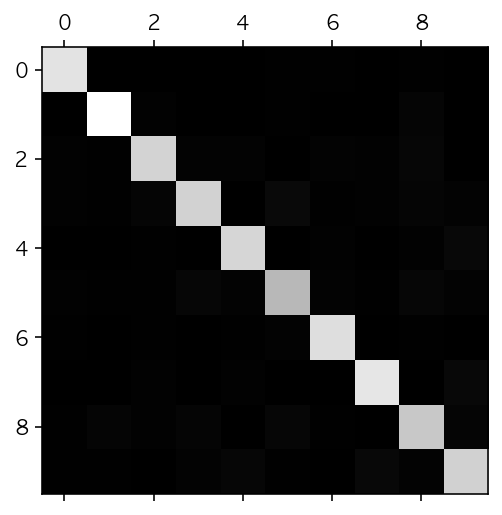

In [222]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [223]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

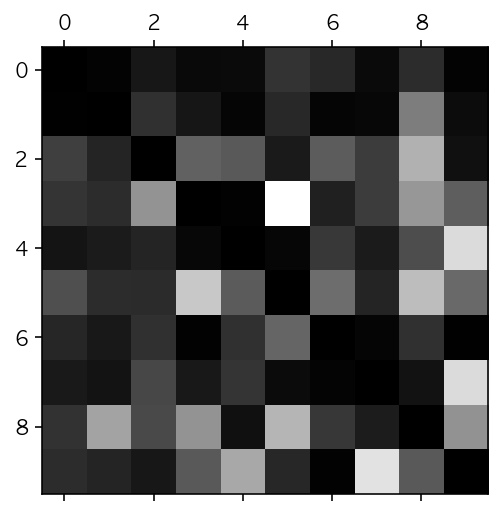

In [224]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

행 = 실제 클래스 / 열 = 예측 클래스

밝은 부분일 수록 값이 큰 것을 의미하며, 밝을수록 다른 숫자와 혼동이 되었다는 것을 의미한다.

위 그래프를 바탕으로 보면, 3과 5가 서로 혼돈되는 것을 보완하고, 8과 9를 더 잘 분류할 수 있도록 개선할 필요가 보인다.

예를 들어, 이 숫자들에 대한 훈련 데이터를 더 모을 수 있다. 또는 분류기에 도움 될 만한 특성을 더 찾아볼 수 있습니다. 예를 들어 동심원의 수를 세는 알고리즘 같은 것(8은 두 개, 6은 하나, 5는 0개) 또는 동심원 같은 어떤 패턴이 드러나도록 (Scikit-image, Pillow, OpenCV 등을 사용해서)이미지를 전처리 해볼 수 있습니다.

In [229]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

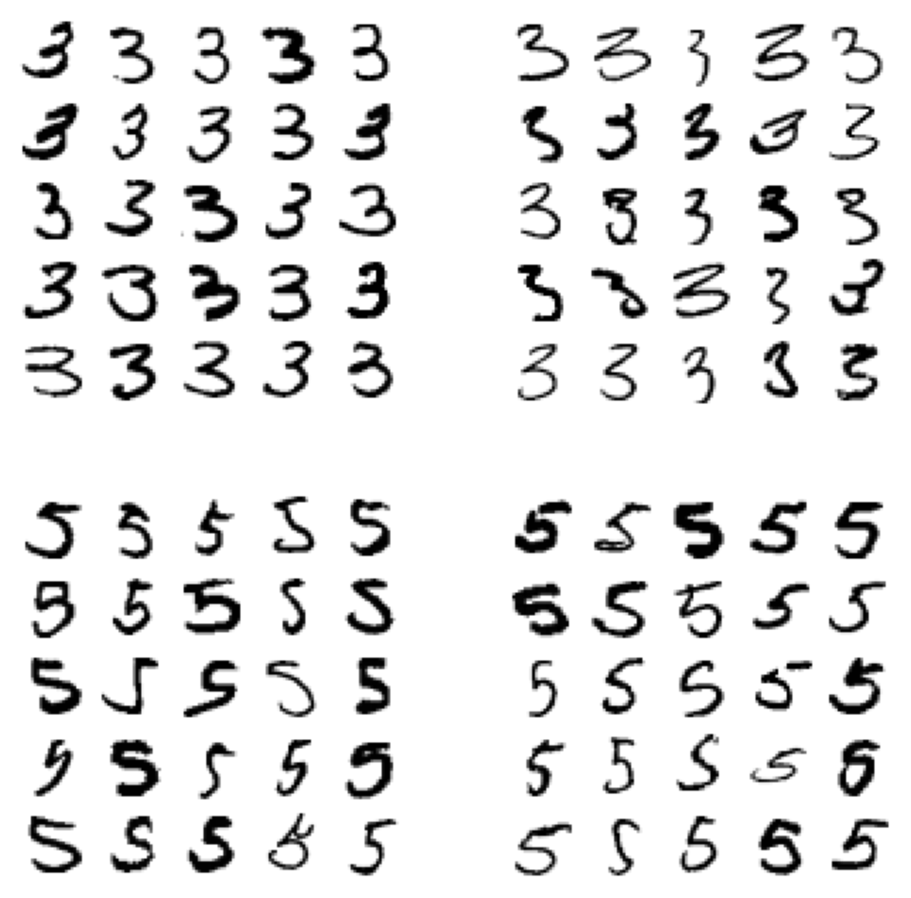

In [231]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### 3.6 다중 레이블 분류

Multilabel classificaition

얼굴 인식 분류기와 같이 같은 사진에 여러 사람이 등장하는 경우에 각각의 사람들(다중 레이블)을 분류해줘야한다.

In [233]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

KNeighborsClassifier, 결정 트리, 랜덤 포레스트, OneVsRestClassifier에서 다중 레이블 분류를 지원한다.

In [234]:
knn_clf.predict([some_digit])

array([[ True,  True]])

숫자 9는 7보다 큰 수이면서, 홀수 이기에 True, True 결과가 나왔다.

In [237]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9769130570549585

다중 레이블 분류기를 평가하는 방법은 많다. 적절한 지표는 프로젝트에 따라 다르다. 예를 들어 각 레이블의 F1 를 구하고 (또는 앞서 언급한 어떤 이진 분류 지표를 사용하여) 간단하게 평균 점수를 계산한다. 위 코드는 모든 레이블에 대한 F1점수의 평균을 계산한다.

실제로는 아닐 수 있지만 이 코드는 모든 레이블의 가중치가 같다고 가정한 것이다. 특히 앨리스 사진이 밥이나 찰리 사진보다 훨씬 많다면 앨리스 사진에 대한 분류기의 점수에 더 높은 가중치를 둘 것이다. 간단한 방법을 레이블에 클래스의 지지도(support)(즉, 타깃 레이블에 속한 샘플 수)를 가중치로 주는 것이다. 이렇게 하려면 위 코드에서 average='weighted'로 설정하면 된다.

### 3.7 다중 출력 분류

다중 출력 다중 클래스 분류(multioutput-multiclass classfication = 다중 출력 분류 multioutput classfication)은 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것이다.(즉, 값을 두 개 이상 가질 수 있다.)

ex) 이미지에서 노이즈를 제거하는 시스템

In [240]:
# noise = np.random.randint(0, 100, (len(X_train), 784))
# X_train_mod = X_train + noise
# noise = np.random.randint(0, 100, (len(X_test), 784))
# X_test_mod = X_test + noise
# y_train_mod = X_train
# y_test_mod = X_test

In [242]:
# knn_clf.fit(X_train_mod, y_train_mod)
# clean_digit = knn.clf.predict([X_test_mod[some_index]])
# plot_digit(clean_digit)

### 3.8 연습문제